<a href="https://colab.research.google.com/github/manelleyva/03.-Algoritmos-de-Optimizacion-2023/blob/main/Retos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Manel Leyva Martínez

Github: https://github.com/manelleyva/03.-Algoritmos-de-Optimizacion-2023

# Retos

## Reto: Colonia de Hormigas con Feromonas

In [ ]:
#Modulo de llamadas http para descargar ficheros
!pip install requests

#Libreria del problema TSP: http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsplib.html
!pip install tsplib95

In [2]:
import tsplib95
import random
from math import e
import urllib.request
import os
import numpy as np

In [3]:
#DATOS DEL PROBLEMA
file = "swiss42.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion(lista de nodos)
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

In [6]:
def Add_Nodo(problem, H ,T ) :
  #Mejora:Establecer una funcion de probabilidad para
  # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
  Nodos = list(problem.get_nodes())
  return random.choice(   list(set(range(1,len(Nodos))) - set(H) )  )


def Incrementa_Feromona(problem, T, H ) :
  #Incrementa segun la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total
  for i in range(len(H)-1):
    T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
  return T

def Evaporar_Feromonas(T ):
  #Evapora 0.3 el valor de la feromona, sin que baje de 1
  #Mejora:Podemos elegir diferentes funciones de evaporación dependiendo de la cantidad actual y de la suma total de feromonas depositadas,...
  T = [[ max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
  return T

In [4]:
#Mejora:Establecer una funcion de probabilidad para
# añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
def Add_Nodo_feromonas(problem, H, T, alpha, beta ) :
  # Get current node and unvisited nodes
  nodes = list(problem.get_nodes())
  unvisited_nodes = list(set(range(1,len(nodes))) - set(H) )
  current_node = H[-1]

  # Get probabilities to visit nodes
  total_probability = 0
  probability_list = []
  for next_node in unvisited_nodes:
    pheromone = T[current_node][next_node]
    inv_distance = 1/distancia(current_node, next_node, problem)
    probability = (pheromone ** alpha) * (inv_distance ** beta)
    probability_list.append(probability)

    total_probability += probability

  # Normalize probability
  normalized_probability_list = [probability/total_probability for probability in probability_list]

  return np.random.choice( unvisited_nodes, 1, p = normalized_probability_list )[0]

In [8]:
def hormigas_feromonas(problem, N, alpha, beta) :
  #problem = datos del problema
  #N = Número de agentes(hormigas)

  #Nodos
  Nodos = list(problem.get_nodes())
  #Aristas
  Aristas = list(problem.get_edges())

  #Inicializa las aristas con una cantidad inicial de feromonas:1
  #Mejora: inicializar con valores diferentes dependiendo diferentes criterios
  T = [[ 1 for _ in range(len(Nodos)) ] for _ in range(len(Nodos))]

  #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
  Hormiga = [[0] for _ in range(N)]

  #Recorre cada agente construyendo la solución
  for h in range(N) :
    #Para cada agente se construye un camino
    for i in range(len(Nodos)-1) :

      #Elige el siguiente nodo
      Nuevo_Nodo = Add_Nodo_feromonas(problem, Hormiga[h], T, alpha, beta)
      Hormiga[h].append(Nuevo_Nodo)

    #Incrementa feromonas en esa arista
    T = Incrementa_Feromona(problem, T, Hormiga[h] )
    #print("Feromonas(1)", T)

    #Evapora Feromonas
    T = Evaporar_Feromonas(T)
    #print("Feromonas(2)", T)

    #Seleccionamos el mejor agente
  mejor_solucion = []
  mejor_distancia = 10e100
  for h in range(N) :
    distancia_actual = distancia_total(Hormiga[h], problem)
    if distancia_actual < mejor_distancia:
      mejor_solucion = Hormiga[h]
      mejor_distancia =distancia_actual


  print(mejor_solucion)
  print(f'La mejor distancia es de {mejor_distancia}')

# Probar resultados
alpha = 1
beta = 2
hormigas_feromonas(problem, 1000, alpha, beta)

[0, 1, 4, 28, 26, 5, 13, 7, 6, 3, 27, 2, 10, 11, 12, 8, 39, 21, 40, 24, 30, 29, 18, 41, 25, 19, 14, 16, 15, 37, 31, 17, 36, 35, 33, 20, 34, 38, 22, 9, 23, 32]
La mejor distancia es de 1977


Como se puede observar, la utilización de las feromonas en el algoritmo mejoran de manera sustancial el resultado.

## Reto: Descenso de gradiente para una función con 2 variables

Implementa el método de descenso de gradiente para la siguiente función:

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
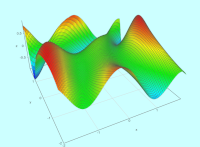


Como primer paso calculamos las derivadas parciales de $f(x)$ y las expresamos en la función grad_f(x).

$$
\frac{\delta}{\delta x} f(x) =
x·cos(2x+1-e^y)cos(\frac{x^2}{2}-\frac{y^2}{4}+3) -
2sin(2x+1-e^y)sin(\frac{x^2}{2}-\frac{y^2}{4}+3)
$$

$$
\frac{\delta}{\delta y} f(x) =
-\frac{y·cos(2x+1-e^y)cos(\frac{x^2}{2}-\frac{y^2}{4}+3)}{2}
+e^ysin(2x+1-e^y)sin(\frac{x^2}{2}-\frac{y^2}{4}+3)
$$

In [9]:
import numpy as np
import math

#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

# Definimos el gradiente de la función
def grad_f(X):
    return [
        X[0]*math.cos( 2*X[0] + 1 - math.exp(X[1]) ) * math.cos( (X[0]**2)/2 - (X[1]**2)/4 + 3 ) -
        2*math.sin( 2*X[0] + 1 - math.exp(X[1]) ) * math.sin( (X[0]**2)/2 - (X[1]**2)/4 +3 ),

        -(X[1]*math.cos( 2*X[0] + 1 - math.exp(X[1]) ) * math.cos( (X[0]**2)/2 - (X[1]**2)/4 + 3) )/2 +
        math.exp(X[1])*math.sin( 2*X[0] + 1 - math.exp(X[1]) ) * math.sin( (X[0]**2)/2 - (X[1]**2)/4 +3 )
    ]

Definimos la función "gradient_descent" que aplica el método iterativo de descenso de gradiente.

In [10]:
def gradient_descent(grad_f, x0, learning_rate, tol, maxit):
    """
    :param
        grad_f: gradiente de la función que se quiere analizar
        x0: posición inicial del análisis
        learning_rate: ratio de aprendizaje constante
        tol: tolerancia a partir de la cual finalizar el proceso
        maxit: número máximo de iteraciones
    :return
        Mínimo encontrado por el método de descenso de gradiente.
    """
    x = x0 # Initialize x value

    for it in range(int(maxit)):
        grad_norm = np.linalg.norm(grad_f(x)) # Cálculo de la norma del gradiente
        x = x - [learning_rate * partial_grad for partial_grad in grad_f(x)]

        if grad_norm < tol: # Si tolerancia superior a norma finaliza el bucle
            return x
    return x

In [11]:
# Definicimos los parámetros de entrada
x0 = np.array([1, 1])  # Punto inicial
learning_rate = 0.01
tol = 1e-12
maxit = 1e5

# Ejecutamos el método de descenso de gradiente
result = gradient_descent(grad_f, x0, learning_rate, tol, maxit)
print(f"Resultado: x_min = {result[0]:.2e}, y_min = {result[1]:.2e}")

Resultado: x_min = 2.20e+00, y_min = 1.69e+00


Dependiendo del punto inicial podemos obtener un valor mínimo local u otro. Para conseguir algunos de los mínimos locales de la función, inicializamos aleatoriamente el valor inicial en un rango.

In [12]:
import random

# Definicimos los parámetros de entrada
number_x0 = 20
x0_min = -3
x0_max = 3
learning_rate = 0.01
tol = 1e-12
maxit = 1e5

# Ejecutamos el método de descenso de gradiente
result_list_x = []
result_list_y = []
result_list_z = []
for i in range(number_x0):
    x0 = np.array([random.uniform(x0_min, x0_max), random.uniform(x0_min, x0_max)])  # Punto inicial
    result_x, result_y = gradient_descent(grad_f, x0, learning_rate, tol, maxit)
    result_z = f([result_x, result_y])
    print(f"Resultado: x_min = {result_x:.2e}, y_min = {result_y:.2e}, z = {result_z}")
    result_list_x.append(result_x)
    result_list_y.append(result_y)
    result_list_z.append(result_z)

Resultado: x_min = -2.66e+00, y_min = -9.90e-01, z = -0.0002611583025101144
Resultado: x_min = -2.06e+00, y_min = -3.77e+00, z = -1.0
Resultado: x_min = -8.23e-01, y_min = -4.99e-01, z = -0.04198326472122554
Resultado: x_min = -2.66e+00, y_min = 2.72e+00, z = -0.8191911566030617
Resultado: x_min = -2.06e+00, y_min = -3.77e+00, z = -1.0
Resultado: x_min = 2.20e-01, y_min = 2.39e+00, z = -0.9995338037110401
Resultado: x_min = -2.03e+00, y_min = 1.17e+00, z = -1.0
Resultado: x_min = 2.67e+00, y_min = -2.73e+00, z = -1.0
Resultado: x_min = 1.10e+00, y_min = -2.85e+00, z = -1.0
Resultado: x_min = -2.03e+00, y_min = 1.17e+00, z = -1.0
Resultado: x_min = 2.20e+00, y_min = 1.69e+00, z = -1.0
Resultado: x_min = 2.20e+00, y_min = 1.69e+00, z = -1.0
Resultado: x_min = -8.23e-01, y_min = -4.99e-01, z = -0.041983264721225454
Resultado: x_min = 1.10e+00, y_min = -2.85e+00, z = -1.0
Resultado: x_min = 1.10e+00, y_min = -2.85e+00, z = -1.0
Resultado: x_min = 2.57e+00, y_min = 2.52e+00, z = -1.0
Result

Como se puede observar, hemos conseguido distintos puntos mínimos locales.

## Reto : Reto 8 Reinas

In [13]:
# Ocho reinas
# Escribe aquí tu código
# Backtracking

# Definimos tamaño del tablero y número de reinas
N_QUEENS = 8

# Create class Queen
class Queen:
  def __init__(self, x_pos, y_pos):
    self.x_pos = x_pos
    self.y_pos = y_pos

# Definimos un método que determine si una posición es segura
def get_safe_positions(N_QUEENS, queen_list):
  """
  Returns a board which indicates the safe positions
  (True: Safe, False: Not safe)
  """
  board = [[True for _ in range(N_QUEENS)] for _ in range(N_QUEENS)]
  for queen in queen_list:
      for x in range(N_QUEENS):
        for y in range(N_QUEENS):
          if (x == queen.x_pos or y == queen.y_pos or
              x-y == queen.x_pos-queen.y_pos or
              -y-x == -queen.y_pos-queen.x_pos):
            board[y][x] = False
  return board

def get_queen_solutions(queen_list, solutions, N_QUEENS):
  board = get_safe_positions(N_QUEENS, queen_list)
  for x in range(N_QUEENS):
    for y in range(N_QUEENS):
      # Position safe for queen --> Possible solution
      if board[y][x] == True:
        queen_list.append(Queen(x,y))

        # Solution found
        if len(queen_list) == N_QUEENS:
          solutions.append(queen_list)
          return True

        # Keep iterating
        else:
          if get_queen_solutions(queen_list, solutions, N_QUEENS):
            return True

        # No solution found: Remove last queen pos
        queen_list.pop(-1)

      # Position not safe for queen --> Not a solution
      else:
        pass

  # No solution found
  return False

queen_list = []
solutions = []
get_queen_solutions(queen_list, solutions, N_QUEENS)

# Función que nos permite imprimir el resultado
def print_board(queen_list, N_QUEENS):
  # Get board
  board = get_safe_positions(N_QUEENS, queen_list)

  # Add queens to board
  for idx, queen in enumerate(queen_list):
    # board[queen.y_pos][queen.x_pos] = f'{idx+1}'
    board[queen.y_pos][queen.x_pos] = 'Q'

  # Display board
  for row in board:
    text_row = ''
    for pos in row:
      if pos == False:
        text_row += f' x '
      elif pos == True:
        text_row += f' · '
      else:
        text_row += f' {pos} '
    print(text_row)

# Print Results
for idx_sol, queen_list in enumerate(solutions):
  print_board(queen_list, N_QUEENS)

 Q  x  x  x  x  x  x  x 
 x  x  x  x  x  x  Q  x 
 x  x  x  x  Q  x  x  x 
 x  x  x  x  x  x  x  Q 
 x  Q  x  x  x  x  x  x 
 x  x  x  Q  x  x  x  x 
 x  x  x  x  x  Q  x  x 
 x  x  Q  x  x  x  x  x 


Esta versión del ejercicio únicamente da una solución al problema de las 8 reinas. Sin embargo, se podría realizar una mejora que obtuviera las 92 soluciones.

## Reto: Criba de Erastótenes

Implementa el algoritmo de la Criba de Erastótenes para encontrar número primos. Encuentra los números primos entre los 10.000 primeros números naturales


In [14]:
# Criba de Erastótenes
import math
import numpy as np

def alg_criba_erastotenes(N):
  # Inicializamos una lista de booleanos que indicará si un número es primo (True) o compuesto (False)
  lista_primos = [True]*(N+1)

  # 0 y 1 no son primos por tanto los marcamos como False
  lista_primos[0] = lista_primos[1] = False

  # Algoritmo de criba
  for i in range(2, int(math.sqrt(N)+1)):
    if lista_primos[i]: # i es primo, por tanto marcamos sus múltimplos como compuestos
      for j in range(i, int(N/i)+1):
          lista_primos[i*j] = False

  # Obtenemos las posiciones con valor True para obtener la lista de primos
  lista_numeros_primos = np.where(np.array(lista_primos) == True)[0]

  return lista_numeros_primos

In [15]:
# Probamos el algoritmo
N = 10000
lista_numeros_primos = alg_criba_erastotenes(N)

# Display result
COLS = 150
text_row = ""
for idx, number in enumerate(lista_numeros_primos):
    if len(text_row) >= COLS:
        print(text_row)
        text_row = ""
    text_row += f'{number}  '

2  3  5  7  11  13  17  19  23  29  31  37  41  43  47  53  59  61  67  71  73  79  83  89  97  101  103  107  109  113  127  131  137  139  149  151  
157  163  167  173  179  181  191  193  197  199  211  223  227  229  233  239  241  251  257  263  269  271  277  281  283  293  307  311  313  317  
331  337  347  349  353  359  367  373  379  383  389  397  401  409  419  421  431  433  439  443  449  457  461  463  467  479  487  491  499  503  
509  521  523  541  547  557  563  569  571  577  587  593  599  601  607  613  617  619  631  641  643  647  653  659  661  673  677  683  691  701  
709  719  727  733  739  743  751  757  761  769  773  787  797  809  811  821  823  827  829  839  853  857  859  863  877  881  883  887  907  911  
919  929  937  941  947  953  967  971  977  983  991  997  1009  1013  1019  1021  1031  1033  1039  1049  1051  1061  1063  1069  1087  1091  1093  
1097  1103  1109  1117  1123  1129  1151  1153  1163  1171  1181  1187  1193  1201  1213  121

## Reto: Gradient Descent para una regresión lineal

Implemente el código del descenso por gradiente para la regresión lineal.

Para poder calcular el descenso de gradiente necesitamos encontrar la función de coste que queremos minimizar. En este caso es el error cuadrático medio (Mean Square Error = MSE) entre las medidas reales y las predichas.

$$MSE=\frac{1}{n}\sum_{i=1}^{n}(Y_{prediction}-Y_{real})^2 =
\frac{1}{n}\sum_{i=1}^{n}((m·x+b)-Y_{real})^2
$$

Para poder utilizar el método de descenso del gradiente tenemos entonces que encontrar las derivadas parciales respecto a $m$ y $b$.

$$\frac{\partial}{\partial m}MSE = \frac{2}{n}\sum_{i=1}^{n}(x·(m·x+b)-Y_{real}) $$
$$\frac{\partial}{\partial b}MSE = \frac{2}{n}\sum_{i=1}^{n}((m·x+b)-Y_{real}) $$

Una vez encontradas las derivadas podemos encontrar los valores predichos de $m$ y $b$ utilizando las ecuaciones de descenso de gradiente.

$$m_{i+1}=m_i-\gamma \frac{\partial}{\partial m}MSE$$

$$b_{i+1}=b_i-\gamma \frac{\partial}{\partial b}MSE$$

In [16]:
def gradient_descent(x, y_real, learning_rate, iter):
    """
    :param
        x: puntos en el eje x de los datos introducidos
        y: puntos en el eje y de los datos introducidos
        learning_rate: ratio de aprendizaje constante
        iter: número de iteraciones
    :return
        m, b
            m : Pendiente de la regresión lineal
            b : intersección (constante de la recta de la regresión lineal)
    """

    # Initialize values
    n = len(y_real)
    m = 0 # Inicializamos la pendiente a 0
    b = 0 # Inicializamos la intersección

    # Gradient descent iterations
    for _ in range(iter):
        y_pred = m*x + b # Model prediction

        # Calculate gradients
        grad_m = (2/n)*np.sum((y_pred-y_real)*x)
        grad_b = (2/n)*np.sum(y_pred-y_real)

        # Calculate new "m" and "b"
        m = m - learning_rate*grad_m
        b = b - learning_rate*grad_b

    return m, b

In [17]:
import numpy as np

# Create a line using the m and b parameters
def f(x, m, b):
    return m*x + b

# Initialize data
x = np.random.uniform(0,1,20)
noise_variance =0.2
m_real = 2
b_real = 0
noise = np.random.randn(x.shape[0])*noise_variance
y_real = f(x, m_real, b_real) + noise

# Calculate gradient descent
learning_rate = 0.01
iter = 10000
m_pred, b_pred = gradient_descent(x, y_real, learning_rate, iter)
y_pred = m_pred*x+b_pred

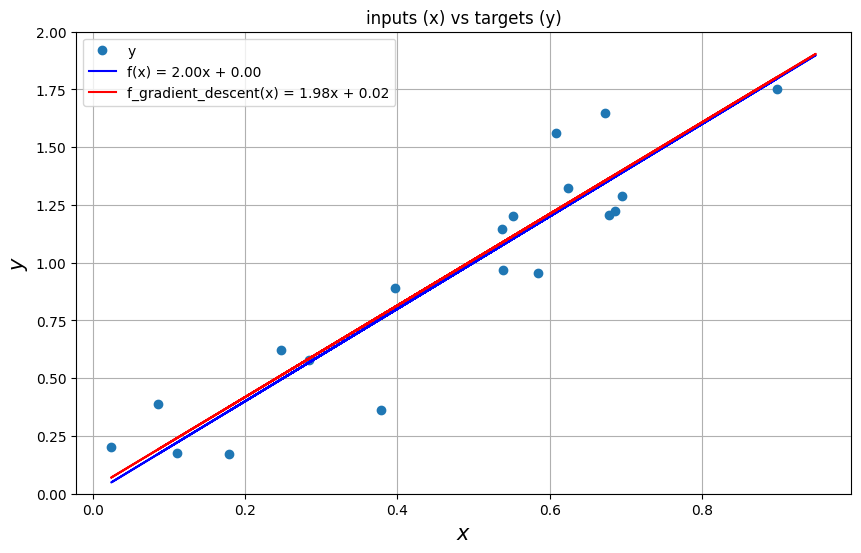

In [19]:
import matplotlib.pyplot as plt

# Graph results
plt.plot(x, y_real, 'o', label='y')
plt.plot(x, f(x, m_real, b_real), 'b-', label=f'f(x) = {m_real:.2f}x + {b_real:.2f}')
plt.plot(x, y_pred, 'r-', label=f'f_gradient_descent(x) = {m_pred:.2f}x + {b_pred:.2f}')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((10,6))
plt.show()

Como se puede observar, el método de descenso de gradiente consigue una aproximación muy buena a la función real. Obviamente, aumentando el número de iteraciones es posible conseguir una aproximación aún mejor.